##***K-NEAREST NEIGHBORS CLASSIFICATION -KNN***

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()


In [3]:
df = pd.DataFrame(iris.data , columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df0 = df[df['target']==0]
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df1 = df[df['target']==1]
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [8]:
df2 = df[df['target']==2]
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6  #To make it large


***Sepal width vs Sepal length(setosa vs versicolor)***

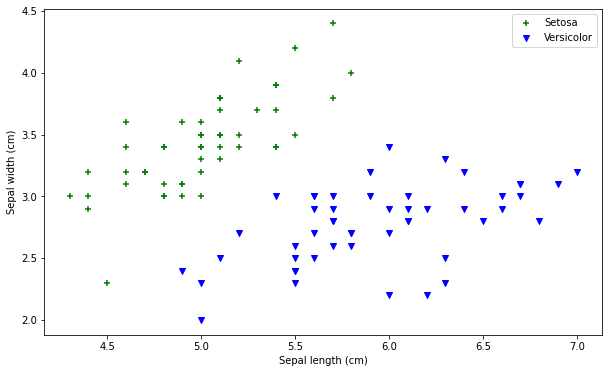

In [10]:
plt.scatter(df0['sepal length (cm)'] , df0['sepal width (cm)'] , color='green' , marker='+',label='Setosa')
plt.scatter(df1['sepal length (cm)'] , df1['sepal width (cm)'] , color='blue' , marker='v',label='Versicolor')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend( )
plt.show()

***Petal length vs Pepal Width (Setosa vs Versicolor)***

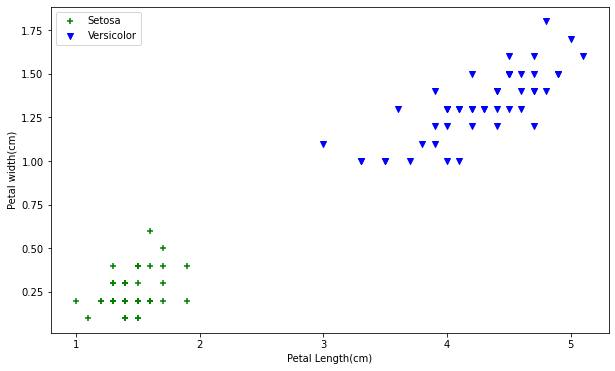

In [11]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+',label='Setosa')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='v',label='Versicolor')
plt.xlabel('Petal Length(cm)')
plt.ylabel('Petal width(cm)')
plt.legend()
plt.show();

###***Train test split***

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(['target'] , axis=1)
Y = df.target

In [18]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [19]:
X_train.shape

(120, 4)

In [20]:
X_test.shape

(30, 4)

###***Create KNN (K Neighrest Neighbour Classifier)***

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train , Y_train)

KNeighborsClassifier(n_neighbors=10)

In [27]:
knn.score(X_test,Y_test)

0.9666666666666667

In [29]:
from sklearn.metrics import confusion_matrix
y_predicted = knn.predict(X_test)
cm = confusion_matrix(Y_test , y_predicted)


Text(42.0, 0.5, 'Truth')

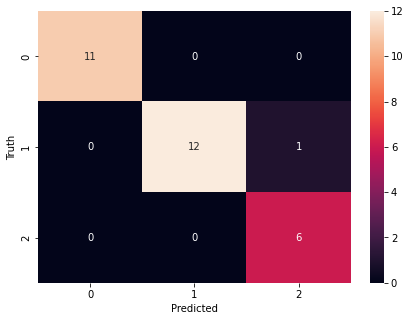

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

By reading the confusion matrix we see that ***setosa***(0) has been predicted 11 times correctly , ***versicolor***(1) has been predicted 12times correctly , ***verginica***(2) has been predicted 6 times correctly and one time wrong .\

it means that anything besides the diagonal is the wrong predictions and in that case we've 29 times correct prediction against 1 wrong , so the score of the model is 29/30 = 0.96666